In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from venny4py.venny4py import *
from upsetplot import UpSet


In [2]:
pathOut = '../Data/CleanedScaledData/'
cleanData = pd.read_csv(f'{pathOut}CleanedScaledData.csv')
fig3Path = "../Figure/Figure 3/Individual Figures/"

In [3]:
len(cleanData)

163534

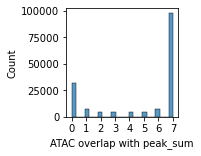

In [4]:
plt.figure(figsize=(2,2))
sns.histplot(data=cleanData, x='ATAC overlap with peak_sum', binwidth=0.3)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])
plt.savefig(fig3Path +"ATAC overlap with peak_sum_dist.pdf", dpi=300, bbox_inches='tight')

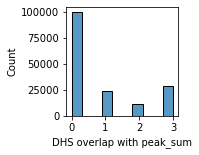

In [5]:
plt.figure(figsize=(2,2))

sns.histplot(data=cleanData, x='DHS overlap with peak_sum', binwidth=0.3)
plt.xticks([0, 1, 2, 3])
plt.savefig(fig3Path +"DHS overlap with peak_sum_dist.pdf", dpi=300, bbox_inches='tight')

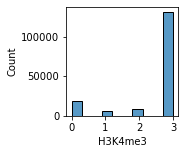

In [6]:
plt.figure(figsize=(2,2))

sns.histplot(data=cleanData, x='H3K4me3', binwidth=0.3)
plt.xticks([0, 1, 2, 3])
plt.savefig(fig3Path +"H3K4me3 overlap with peak_sum_dist.pdf", dpi=300, bbox_inches='tight')

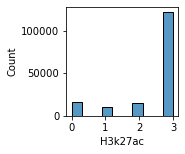

In [7]:
plt.figure(figsize=(2,2))

sns.histplot(data=cleanData, x='H3k27ac', binwidth=0.3)
plt.xticks([0, 1, 2, 3])
plt.savefig(fig3Path +"H3k27ac overlap with peak_sum_dist.pdf", dpi=300, bbox_inches='tight')

In [8]:
107066/len(set(cleanData['sgRNA Context Sequence'].tolist()))

0.8817096269455653

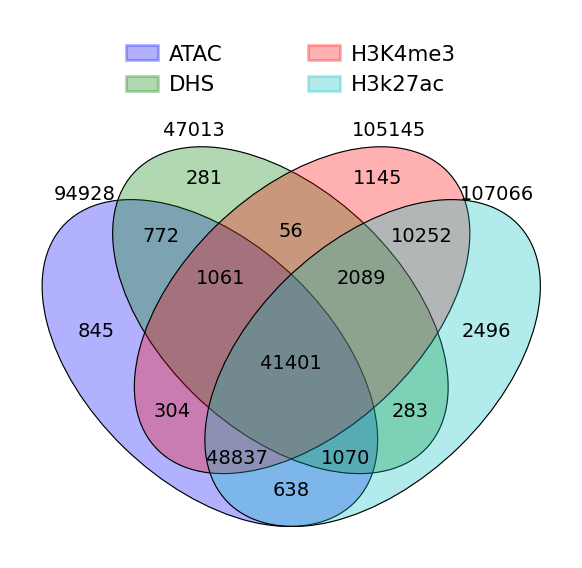

In [9]:
#dict of sets

# Define your four sets (example sets of data)
set1 = set(cleanData[cleanData['ATAC overlap with peak_sum']>0]['sgRNA Context Sequence'].tolist())
set2 = set(cleanData[cleanData['DHS overlap with peak_sum']>0]['sgRNA Context Sequence'].tolist())
set3 = set(cleanData[cleanData['H3K4me3']>0]['sgRNA Context Sequence'].tolist())
set4 = set(cleanData[cleanData['H3k27ac']>0]['sgRNA Context Sequence'].tolist())

# Create a four-set Venn diagram
# venn([set1, set2, set3, set4], names=['Set 1', 'Set 2', 'Set 3', 'Set 4'])

sets = {
    'ATAC': set1,
    'DHS': set2,
    'H3K4me3': set3,
    'H3k27ac': set4}
    
venny4py(sets=sets)
plt.savefig(fig3Path +"Venn Chromatin datasets.pdf", dpi=300, bbox_inches='tight')

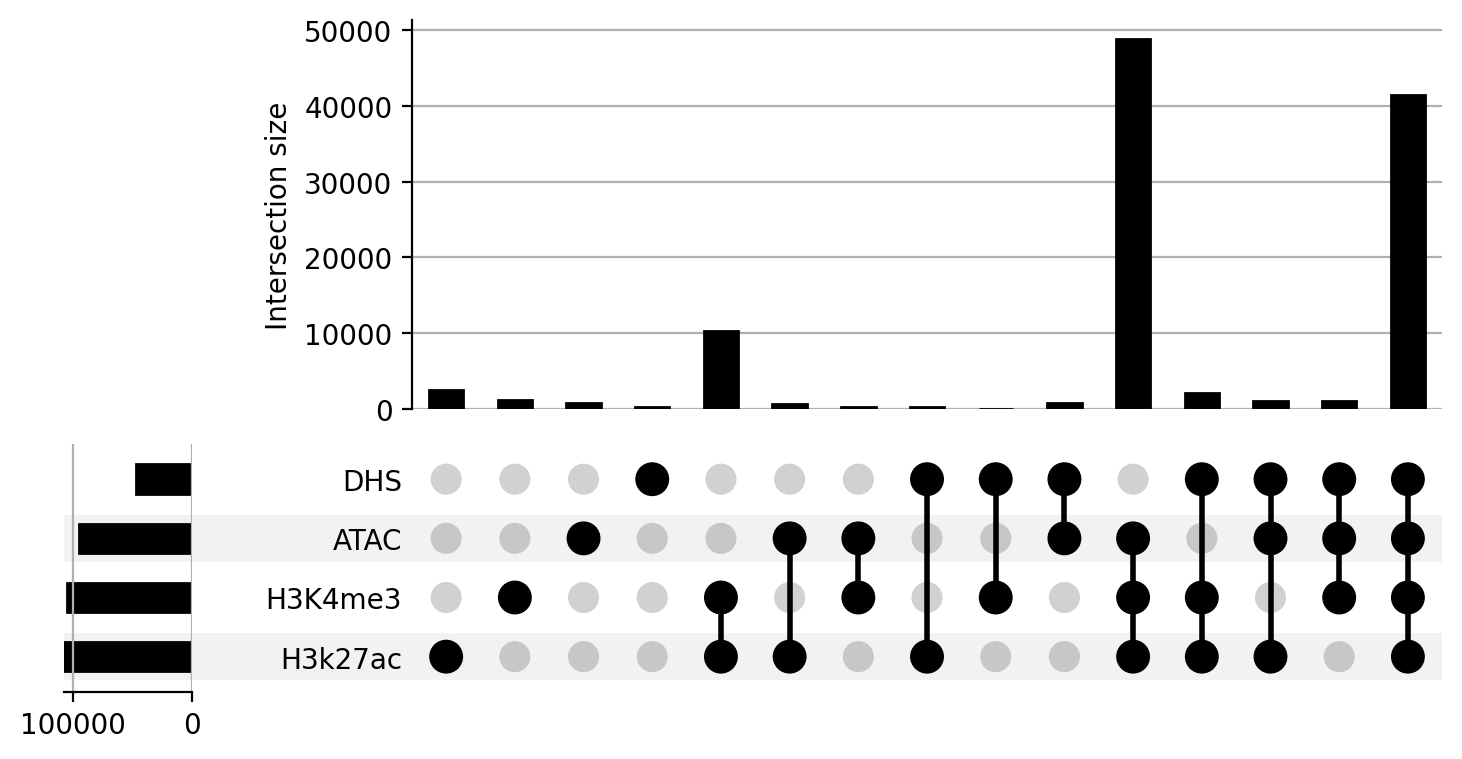

In [17]:

# Sample data: Four sets of sequences
set_names = ['ATAC', 'DHS', 'H3K4me3','H3k27ac']
all_elems = set1.union(set2).union(set3).union(set4)
df = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4] for e in all_elems], columns = set_names)
df_up = df.groupby(set_names).size()
UpSet(df_up, orientation='horizontal')
plt.savefig(fig3Path +"Upset Chromatin datasets.png", dpi=300, bbox_inches='tight')

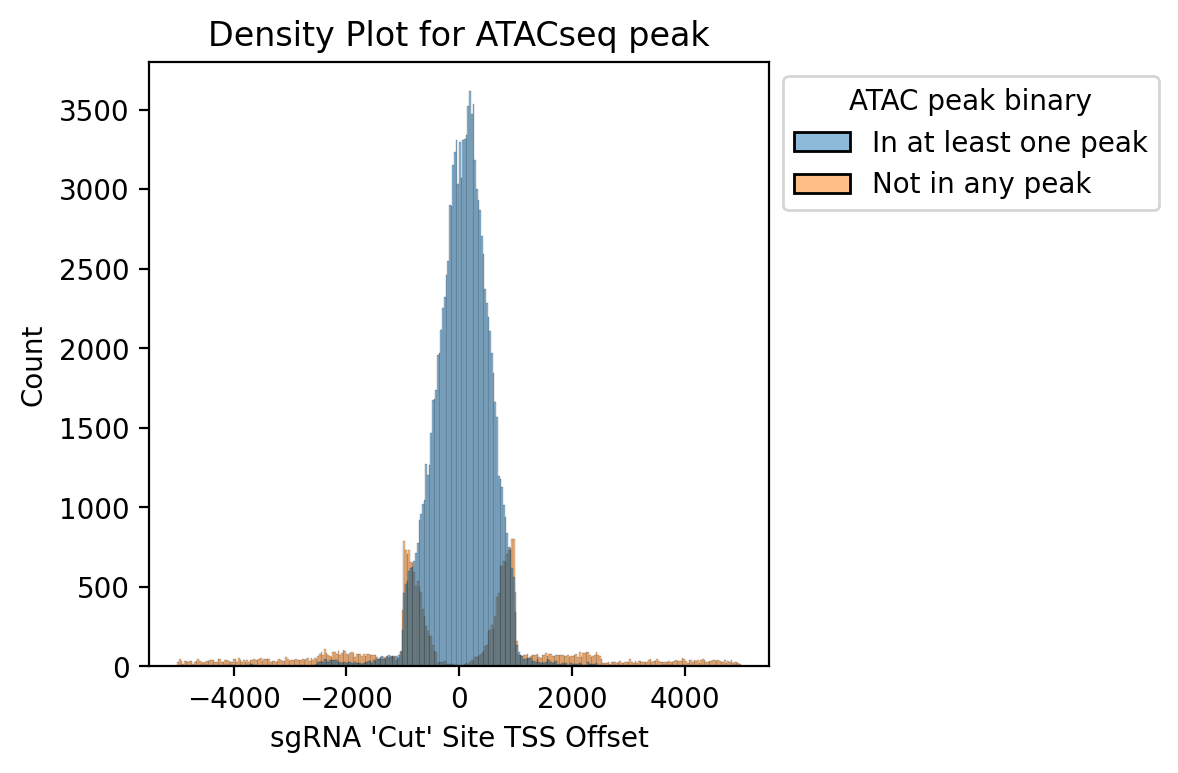

In [11]:
cleanData['ATAC peak binary'] = cleanData['ATAC overlap with peak_sum'].apply(lambda x: 'Not in any peak' if x == 0 else 'In at least one peak')

# Plot the density of the 'value' column, using the new 'group' column for hue
plt.figure(figsize=(4,4))
ax = sns.histplot(data=cleanData, 
            x='sgRNA \'Cut\' Site TSS Offset', hue='ATAC peak binary', fill=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set title and show the plot
plt.title("Density Plot for ATACseq peak")
plt.savefig(fig3Path +"Density Plot for ATACseq peak vs TSS.pdf", dpi=300, bbox_inches='tight')
plt.show()





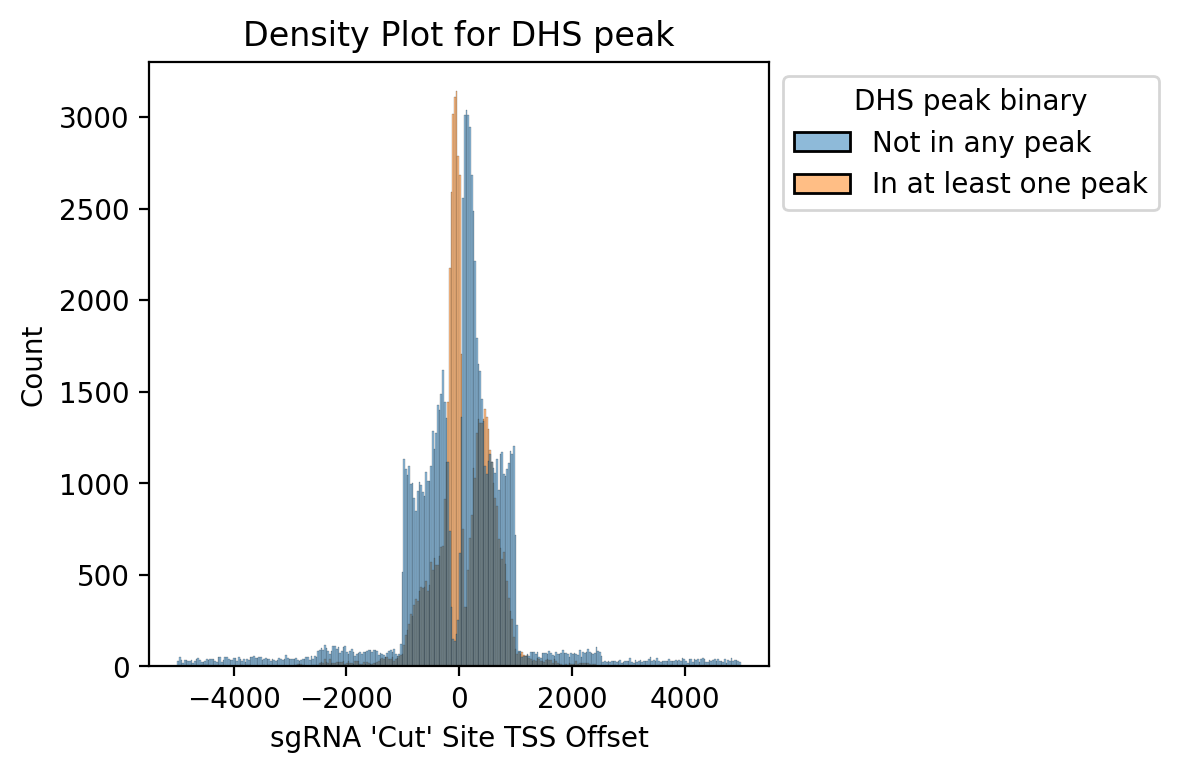

In [12]:
cleanData['DHS peak binary'] = cleanData['DHS overlap with peak_sum'].apply(lambda x: 'Not in any peak' if x == 0 else 'In at least one peak')

# Plot the density of the 'value' column, using the new 'group' column for hue
plt.figure(figsize=(4,4))
ax=sns.histplot(data=cleanData, 
            x='sgRNA \'Cut\' Site TSS Offset', hue='DHS peak binary', fill=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set title and show the plot
plt.title("Density Plot for DHS peak")
plt.savefig(fig3Path +"Density Plot for DHS peak vs TSS.pdf", dpi=300, bbox_inches='tight')

plt.show()


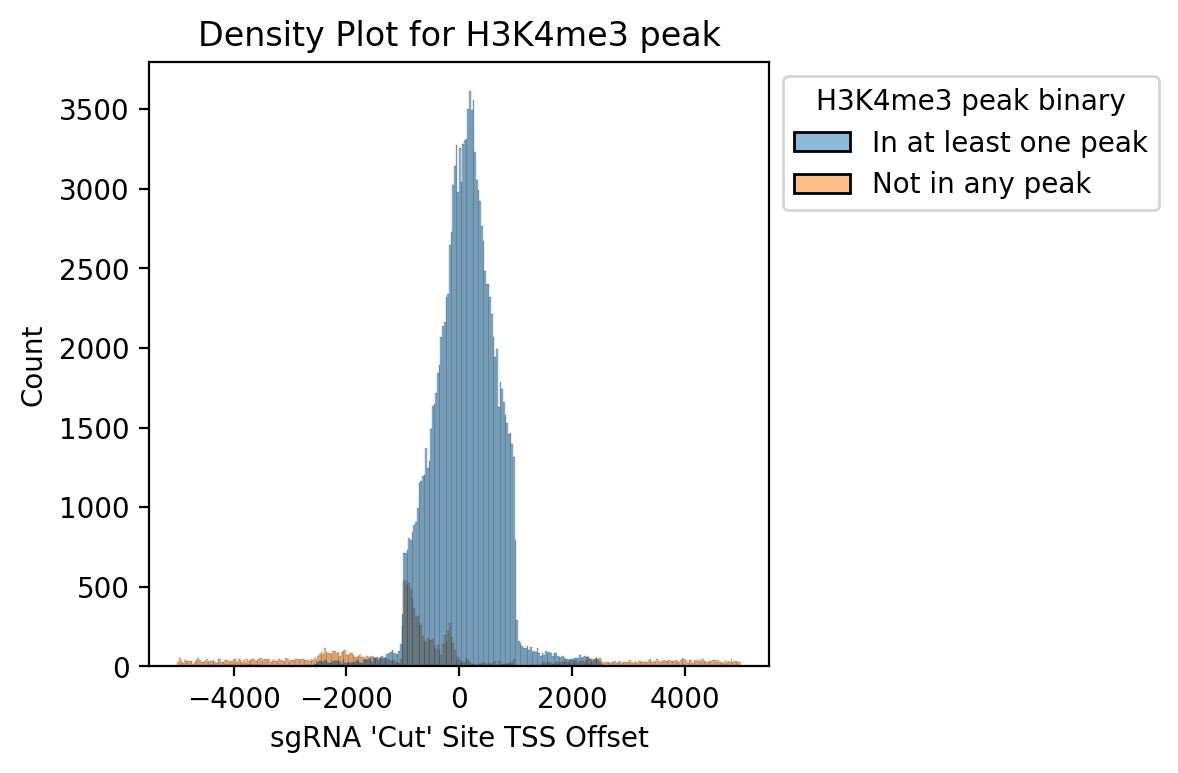

In [13]:

cleanData['H3K4me3 peak binary'] = cleanData['H3K4me3'].apply(lambda x: 'Not in any peak' if x == 0 else 'In at least one peak')

# Plot the density of the 'value' column, using the new 'group' column for hue
plt.figure(figsize=(4,4))
ax=sns.histplot(data=cleanData, 
            x='sgRNA \'Cut\' Site TSS Offset', hue='H3K4me3 peak binary', fill=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set title and show the plot
plt.title("Density Plot for H3K4me3 peak")
plt.savefig(fig3Path +"Density Plot for H3K4me3 peak vs TSS.pdf", dpi=300, bbox_inches='tight')

plt.show()


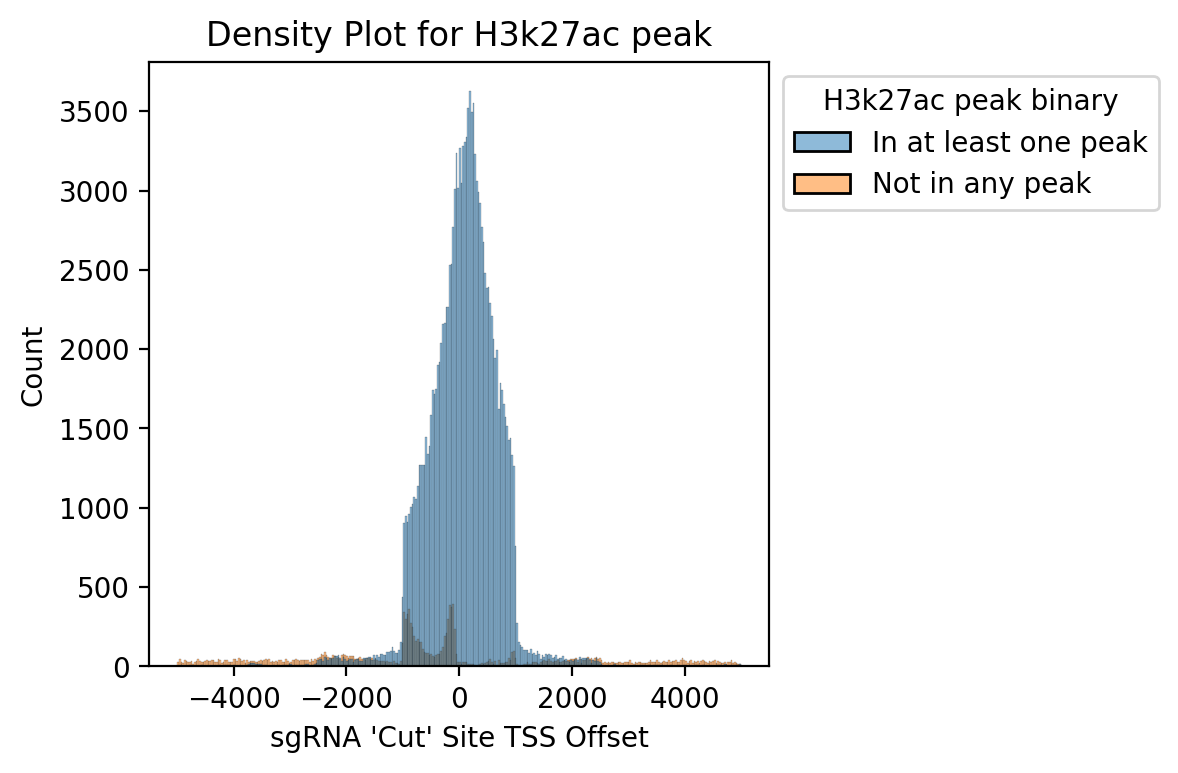

In [14]:

cleanData['H3k27ac peak binary'] = cleanData['H3k27ac'].apply(lambda x: 'Not in any peak' if x == 0 else 'In at least one peak')

# Plot the density of the 'value' column, using the new 'group' column for hue
plt.figure(figsize=(4,4))
ax=sns.histplot(data=cleanData, 
            x='sgRNA \'Cut\' Site TSS Offset', hue='H3k27ac peak binary', fill=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Set title and show the plot
plt.title("Density Plot for H3k27ac peak")
plt.savefig(fig3Path +"Density Plot for H3k27ac peak vs TSS.pdf", dpi=300, bbox_inches='tight')

plt.show()

In [15]:
cleanData[(cleanData['Target Gene Symbol'] == 'ZNF131') & (cleanData['ATAC overlap with peak_sum'] != 0)]['TSS Bucket (-5kb to 5kb)'].value_counts()

[650, 675)      26
[225, 250)      26
[500, 525)      22
[675, 700)      22
[100, 125)      20
[750, 775)      20
[725, 750)      20
[0, 25)         16
[250, 275)      16
[425, 450)      16
[775, 800)      16
[350, 375)      14
[550, 575)      14
[125, 150)      14
[300, 325)      14
[25, 50)        14
[200, 225)      14
[825, 850)      14
[475, 500)      14
[-50, -25)      12
[925, 950)      12
[950, 975)      12
[-25, 0)        12
[850, 875)      12
[525, 550)      12
[275, 300)      12
[50, 75)        12
[-75, -50)      12
[325, 350)      12
[625, 650)      10
[575, 600)      10
[-175, -150)    10
[900, 925)      10
[-150, -125)    10
[75, 100)       10
[-100, -75)     10
[175, 200)      10
[975, 1000)      8
[400, 425)       8
[-200, -175)     8
[375, 400)       8
[700, 725)       6
[-125, -100)     6
[150, 175)       6
[800, 825)       6
[450, 475)       4
[875, 900)       2
Name: TSS Bucket (-5kb to 5kb), dtype: int64